# Text Classifier using Naive Bayes Classification

## Nakul Ramesh Varma - 21BDA35

### Import Libraries

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(16,12)})

### Load Dataset

In [2]:
data = fetch_20newsgroups()
text_categories = data.target_names
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

### View Dataset

In [3]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [4]:
print(test_data.data[2])

From: mathew <mathew@mantis.co.uk>
Subject: Re: STRONG & weak Atheism
Organization: Mantis Consultants, Cambridge. UK.
X-Newsreader: rusnews v1.02
Lines: 9

acooper@mac.cc.macalstr.edu (Turin Turambar, ME Department of Utter Misery) writes:
> Did that FAQ ever got modified to re-define strong atheists as not those who
> assert the nonexistence of God, but as those who assert that they BELIEVE in 
> the nonexistence of God?

In a word, yes.


mathew



### Make Model

In [5]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
model.fit(train_data.data, train_data.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Predict 

In [7]:
predicted_categories = model.predict(test_data.data)

In [8]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


### Model Evaluation

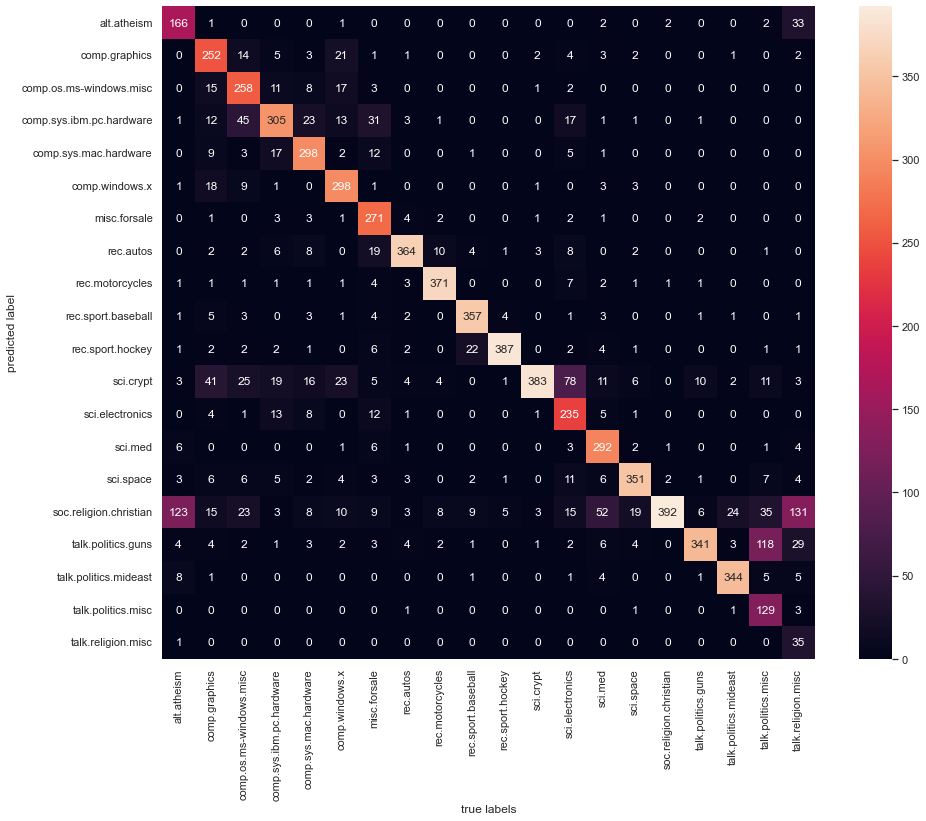

The accuracy is 0.7738980350504514


In [9]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

### Having fun with model

In [10]:
def my_predictions(my_sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([my_sentence])
    return all_categories_names[prediction]

In [11]:
my_sentence = "Religion"
print(my_predictions(my_sentence, model))

['soc.religion.christian']
